# Notebook Dashboard

In [8]:
from os         \
    import      \
    listdir,    \
    mkdir

from os.path    \
    import      \
    join,       \
    isfile,     \
    isdir

from multiprocessing \
    import Pool

from random \
    import SystemRandom

In [11]:
from PIL        \
    import      \
    ImageDraw,  \
    ImageFont

from PIL.Image  \
    import      \
        new,    \
        open,   \
        Image

from HardenedSteel.objects \
    import CounterObject

from IPython.display    \
    import display

In [26]:
width: int = 512
height: int = 512
channels: int = 3

In [81]:
def select_number_in_color_range(
    generator: SystemRandom
) -> int:
    return generator.randint(
        0, 
        255
    )

def generate_color(
    generator: SystemRandom,
    channels: int
) -> tuple:
    result: list = list()

    for i in range(channels):
        result.append(
            select_number_in_color_range(
                generator
            )
        )

    return result

In [82]:
def generate_random_image_row(
    width: int
):
    global channels
    
    result: list = list()
    generator: SystemRandom = SystemRandom()

    for i in range(width):
        result.append(
            generate_color(
                generator,
                channels
            )
        )

    return result


def generate_random_image_columns(
    width: int, 
    height: int
):
    columns: list = list()

    for column in range(height):
        columns.append(
            generate_random_image_row(
                width
            )
        )

    return columns

In [102]:
generated_base = generate_random_image_columns(
    width, 
    height
)

In [103]:
def get_generated_base() -> list:
    global generated_base
    return generated_base

def refresh_generated_base() -> None:
    global generated_base, width, height, channels

    generator = SystemRandom()
    
    for x in range(width):
        row: list = generate_base[x]

        for y in range(height):
            column: list = row[y]

            for channel_index in range(channels):
                channel = select_number_in_color_range(generator)
                column[channel_index] = channel

In [119]:
def preview():
    global generated_base, width, height

    preview = new('RGB', (width, height))
    pixels = preview.load()

    for x in range(width):
        for y in range(height):
            red, green, blue = tuple(generated_base[x][y])
            pixels[x, y] = (red, green, blue)

    return preview

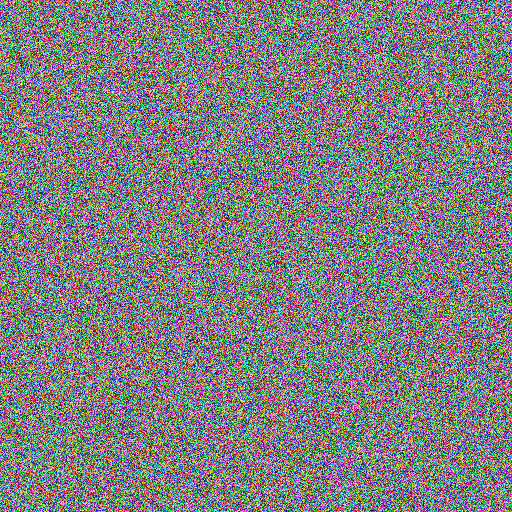

In [125]:
refresh_generated_base()
preview()